In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import *


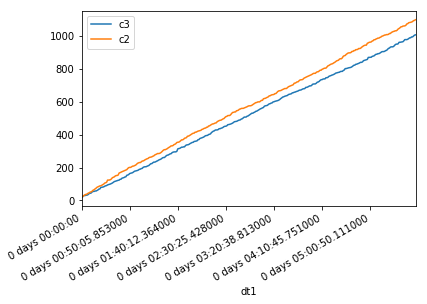

,dt1,controller,drones,queue,deliveries,fullTrips,revenue,costs,penalties,fDel,fRet,fLaunch,total,profit
697,00:00:00,2,15,39,19,10,2328,32.67396,0.000000,0,0,3,78,22.953260
696,00:00:02.963000,3,15,10,16,10,1780,23.72930,0.000000,0,0,7,42,17.562707
695,00:00:59.999000,2,15,40,19,12,2328,38.35097,0.000000,0,0,3,92,22.896490
694,00:01:04.322000,3,15,7,19,13,2126,36.51293,0.000000,0,0,9,44,20.894871
693,00:01:59.994000,2,15,40,22,14,2849,49.11461,0.000000,0,0,3,100,27.998854
692,00:02:04.311000,3,15,12,25,14,2876,43.33873,0.000000,0,0,9,50,28.326613
691,00:02:59.998000,2,14,40,26,18,3252,69.40054,0.000000,0,0,3,110,31.825995
690,00:03:04.322000,3,13,16,26,17,2936,49.78483,0.000000,0,0,9,55,28.862152
689,00:04:00.007000,2,14,40,29,19,3666,73.07672,0.000000,0,0,3,122,35.929233
688,00:04:04.322000,3,14,15,28,21,3056,63.08545,0.000000,0,0,9,59,29.929146


In [22]:
inputfile = "31may_0049_test.txt"
yaxis = 'profit'

df = pd.read_table(inputfile, " ")

df['dt1'] = df['dt1'] + " " + df['dt2'] + " " + df['dt3'] + " " + df['dt4']
df = df.drop(['dt2', 'dt3', 'dt4', 'collisions', 'unknown'], axis=1)
df['dt1'] = df['dt1'].apply(lambda x: pd.to_datetime(parse(x)))
minval = df['dt1'].min()
df['dt1'] = df['dt1'].apply(lambda x: x - minval)
df = df.sort_values(by='dt1')
df['profit'] = ((df['revenue'] - df['costs'])/100) - df['penalties']
c3 = df.loc[df['controller'] == 3]
c2 = df.loc[df['controller'] == 2]

ax = c3.plot(x='dt1', y=yaxis)
c2.plot(x='dt1', y=yaxis, ax=ax)
ax.legend(["c3", "c2"]);
plt.show()

df